---

# 0. Imports

---

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing import image
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

---

# 1. Data

---

## 1.1 Cats Images

In [12]:
train_path = "../data/raw/train"
test_path = '../data/raw/test1'

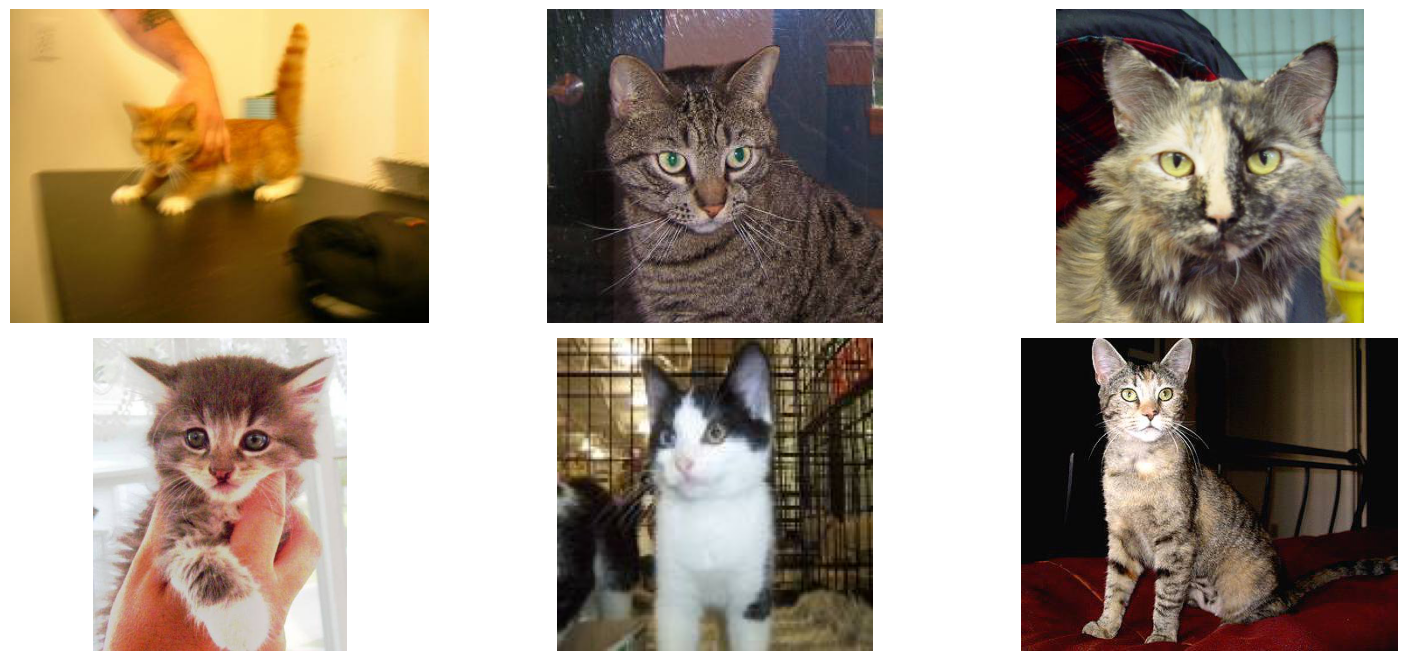

In [13]:
cat_files = [f for f in os.listdir(train_path) if f.startswith('cat.')]

cat_images = []
for file in cat_files[:6]:
    img_array = image.img_to_array(image.load_img(f'{train_path}/{file}'))
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure(figsize=(15, 10))
for i in range(min(9, len(cat_images))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 1.2 Dogs Images

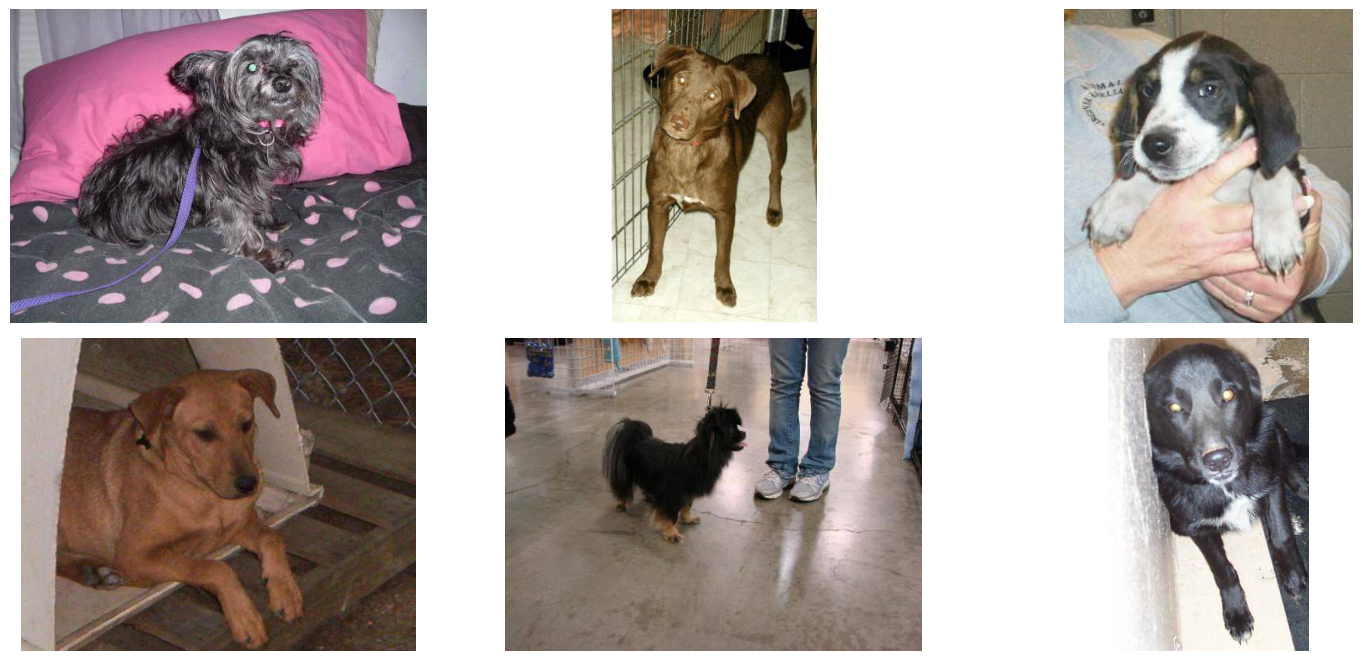

In [14]:
dog_files = [f for f in os.listdir(train_path) if f.startswith('dog.')]

dog_images = []
for file in dog_files[:6]:
    img_array = image.img_to_array(image.load_img(f'{train_path}/{file}'))
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize=(15, 10))
for i in range(min(9, len(dog_images))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

---

# 2. Resize all images

---

In [36]:
datagen = ImageDataGenerator()

train = datagen.flow_from_directory(
    "../data/raw",
    target_size=(200, 200),
    classes=['train'],
    batch_size=8,
    class_mode='categorical'
)


test = datagen.flow_from_directory(
    "../data/raw",
    target_size=(200, 200),
    classes=['test1'],
    batch_size=8,
    class_mode='categorical'
)

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


---

# 3. Model Training

---

In [40]:
model = Sequential()

model.add(Input(shape = (200,200,3)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [41]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

<Sequential name=sequential_6, built=True>

In [42]:
model.fit(train, epochs=1)

  25/3125 ━━━━━━━━━━━━━━━━━━━━ 10:15:40 12s/step - accuracy: 0.8474 - loss: 0.1382

KeyboardInterrupt: 